In [1]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import platform

# 시스템이 Windows일 경우
if platform.system() == 'Windows':
    plt.rc('font', family='Pretendard')
# macOS일 경우 예시:
elif platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')

# 마이너스 부호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

### 피처 재선정 (2차 분석 반영 VFN, 상관계수 등)

In [2]:
# 1. 회원정보
features_member = [
    '남녀구분코드',
    '회원여부_이용가능_카드론', '입회경과개월수_신용', '회원여부_연체', '동의여부_한도증액안내',
    '탈회횟수_누적', '탈회횟수_발급1년이내',
    '거주시도명',
    '유효카드수_신용체크', 
    '이용카드수_신용체크', 
    '이용금액_R3M_신용체크', 
    '보유여부_해외겸용_본인', '이용여부_3M_해외겸용_본인',
    '연회비발생카드수_B0M', '기본연회비_B0M', '제휴연회비_B0M'
]

In [3]:
# 2. 신용정보
features_credit = [
    '최초한도금액',
    '카드이용한도금액', 'CA한도금액',
    '일시상환론한도금액', '월상환론한도금액',
    'CA이자율_할인전',
    'RV일시불이자율_할인전', 'RV현금서비스이자율_할인전',
    'RV약정청구율', 'RV최소결제비율',
    '한도증액횟수_R12M',
    '한도증액금액_R12M', '상향가능CA한도금액', '월상환론상향가능한도금액',
    '일시불ONLY전환가능여부', '특별한도보유여부_R3M', '연체감액여부_R3M'
]

In [4]:
# 3. 승인매출정보
features_tx = [
    '이용건수_신용_B0M',
    '이용금액_일시불_B0M', '이용후경과월_신용', '이용후경과월_일시불', '이용후경과월_체크',
    '이용금액_해외', '쇼핑_도소매_이용금액', '쇼핑_마트_이용금액', '쇼핑_온라인_이용금액',
    '교통_주유이용금액', '교통_정비이용금액', '여유_숙박이용금액',
    '할부건수_3M_R12M', '할부금액_3M_R12M',
    'RP건수_B0M', 'RP건수_통신_B0M', 'RP건수_보험_B0M', 'RP건수_교통_B0M', 'RP후경과월',
    '카드론이용건수_누적', '카드론이용금액_누적', '최종카드론_대출이율', '최종카드론_대출금액',
    '이용건수_온라인_R6M', '이용건수_페이_온라인_R6M',
    '이용건수_A페이_R6M', '이용건수_C페이_R6M', '이용건수_D페이_R6M',
    '이용금액_선결제_R6M', '이용건수_선결제_R6M',
    '연체입금원금_B0M', '정상청구원금_B5M', '선입금원금_B2M',
    '연속유실적개월수_기본_24M_카드',
    '승인거절건수_R3M', '승인거절건수_한도초과_R3M',
    '이용금액대'  # 범주형
]

In [5]:
# 4. 청구입금정보
features_bill = [
    '청구서발송여부_B0', '청구서발송여부_R3M', '청구서발송여부_R6M',
    '청구금액_B0', '청구금액_R3M', '청구금액_R6M',
    '포인트_마일리지_건별_B0M', '포인트_포인트_건별_B0M', '포인트_마일리지_월적립_B0M', '포인트_포인트_월적립_B0M',
    '마일_적립포인트_R3M', '마일_잔여포인트_B0M', '포인트_이용포인트_R12M',
    '할인건수_R3M', '할인금액_R3M', '할인건수_B0M',
    '혜택수혜금액_R3M', '포인트_마일리지_환산_B0M'
]

In [6]:
# 5. 잔액정보
features_balance = [
    '잔액_일시불_B0M', '잔액_할부_B0M',
    '연체잔액_B0M',
    '연체원금_최근', '매각잔액_B1M',
    'RV_평균잔액_R3M',
    '연체잔액_RV일시불_B0M', '연체잔액_CA_B0M',
    '평잔_일시불_3M',
    '평잔_6M', '평잔_카드론_3M', '평잔_CA_3M'
]

In [7]:
#6. 채널정보
features_channel = [
    'IB문의건수_사용승인내역_R6M', 'IB문의건수_선결제_R6M',
    '당사멤버쉽_방문월수_R6M', '당사멤버쉽_방문횟수_B0M', '당사멤버쉽_방문횟수_R6M',
    '방문월수_PC_R6M', '방문월수_앱_R6M',
    '방문일수_PC_B0M', '방문일수_PC_R6M', '방문일수_앱_B0M', '방문일수_앱_R6M',
    '방문횟수_PC_B0M', '방문횟수_PC_R6M', '방문횟수_앱_B0M', '방문횟수_앱_R6M',
    '방문후경과월_PC_R6M', '방문후경과월_앱_R6M',
    '불만제기후경과월_R12M',
    '상담건수_B0M', '상담건수_R6M',
    '이용메뉴건수_ARS_B0M', '이용메뉴건수_IB_R6M',
    '인입일수_ARS_B0M', '인입월수_ARS_R6M',
    '인입일수_IB_B0M', '인입월수_IB_R6M', '인입횟수_IB_R6M',
    '인입후경과월_ARS', '인입후경과월_IB_R6M',
    '홈페이지_금융건수_R3M', '홈페이지_금융건수_R6M',
    '홈페이지_선결제건수_R3M', '홈페이지_선결제건수_R6M'
]

In [8]:
# 7. 마케팅정보
features_marketing = [
    '캠페인접촉건수_R12M', '캠페인접촉일수_R12M',
    '컨택건수_보험_TM_R6M', '컨택건수_부대서비스_TM_R6M', '컨택건수_신용발급_TM_R6M',
    '컨택건수_이용유도_EM_B0M', '컨택건수_이용유도_EM_R6M', '컨택건수_이용유도_LMS_R6M',
    '컨택건수_이용유도_TM_B0M', '컨택건수_이용유도_TM_R6M',
    '컨택건수_이용유도_인터넷_B0M', '컨택건수_이용유도_인터넷_R6M',
    '컨택건수_이용유도_청구서_B0M', '컨택건수_이용유도_청구서_R6M'
]

In [9]:
# 8. 성과정보
features_perf = [
    '증감율_이용건수_할부_전월', '증감율_이용건수_CA_전월', '증감율_이용건수_체크_전월',
    '증감율_이용금액_신용_전월', '증감율_이용금액_할부_전월',
    '증감율_이용금액_신판_전월', '증감율_이용금액_일시불_전월',
    '증감율_이용건수_신판_분기', '증감율_이용건수_일시불_분기',
    '증감율_이용금액_신용_분기', '증감율_이용금액_체크_분기',
    '잔액_신판평균한도소진율_r6m','잔액_신판최대한도소진율_r6m', '잔액_신판ca평균한도소진율_r6m', '잔액_신판ca최대한도소진율_r6m',
    '변동률_RV일시불평잔', '변동률_할부평잔', '변동률_RVCA평잔', '변동률_카드론평잔'
]

In [10]:
member_add = ['입회경과개월수_신용', '이용카드수_신용체크', '이용카드수_신용', '이용카드수_신용_가족', '이용카드수_체크', '이용카드수_체크_가족', 
              '이용금액_R3M_신용체크', '이용금액_R3M_신용', '이용금액_R3M_신용_가족', '이용금액_R3M_체크', '이용금액_R3M_체크_가족']

credit_add = ['최초한도금액', '카드이용한도금액', 'CA한도금액', '일시상환론한도금액', '월상환론한도금액', 'CA이자율_할인전', 'CL이자율_할인전', 'RV일시불이자율_할인전', 'RV현금서비스이자율_할인전', 
              '상향가능한도금액', '상향가능CA한도금액', '월상환론상향가능한도금액', '카드이용한도금액_B1M', '카드이용한도금액_B2M', '연체감액여부_R3M']

tx_add = ['이용후경과월_신용', '이용후경과월_신판', '이용후경과월_일시불', '이용후경과월_할부', '이용후경과월_할부_유이자', '이용후경과월_할부_무이자', '이용후경과월_부분무이자', '이용후경과월_CA', '이용후경과월_체크', '이용후경과월_카드론', 
          '정상청구원금_B0M', '정상청구원금_B2M', '정상청구원금_B5M', '연속유실적개월수_기본_24M_카드']

bill_add = ['청구서발송여부_B0', '청구서발송여부_R3M', '청구서발송여부_R6M', 
            '청구금액_B0', '청구금액_R3M', '청구금액_R6M', 
            '포인트_마일리지_건별_B0M', '포인트_마일리지_건별_R3M', '포인트_포인트_건별_B0M', '포인트_포인트_건별_R3M', '포인트_마일리지_월적립_B0M', '포인트_마일리지_월적립_R3M', '포인트_포인트_월적립_B0M', '포인트_포인트_월적립_R3M', '포인트_적립포인트_R12M', '포인트_적립포인트_R3M', '포인트_이용포인트_R12M', '포인트_이용포인트_R3M', '포인트_잔여포인트_B0M', 
            '할인건수_R3M', '할인건수_B0M', '포인트_마일리지_환산_B0M']

bal_add = ['잔액_일시불_B0M', '잔액_할부_B0M', '잔액_현금서비스_B0M', '잔액_리볼빙일시불이월_B0M', '잔액_리볼빙CA이월_B0M', '잔액_카드론_B0M', '잔액_현금서비스_B1M', '잔액_현금서비스_B2M', '잔액_카드론_B1M', '잔액_카드론_B2M', '잔액_카드론_B3M', '잔액_카드론_B4M', '잔액_카드론_B5M', '잔액_할부_B1M', '잔액_할부_B2M', '잔액_일시불_B1M', '잔액_일시불_B2M', '잔액_할부_유이자_B0M', '잔액_할부_무이자_B0M', '잔액_할부_해외_B0M', 
           '평잔_3M', '평잔_일시불_3M', '평잔_일시불_해외_3M', '평잔_RV일시불_3M', '평잔_RV일시불_해외_3M', '평잔_할부_3M', '평잔_할부_해외_3M', '평잔_CA_3M', '평잔_CA_해외_3M', '평잔_카드론_3M', '평잔_6M', '평잔_일시불_6M', '평잔_일시불_해외_6M', '평잔_RV일시불_6M', '평잔_RV일시불_해외_6M', '평잔_할부_6M', '평잔_할부_해외_6M', '평잔_CA_6M', '평잔_CA_해외_6M', '평잔_카드론_6M']

perf_add = ['잔액_신판평균한도소진율_r6m', '잔액_신판최대한도소진율_r6m', '잔액_신판평균한도소진율_r3m', '잔액_신판최대한도소진율_r3m', '잔액_신판ca평균한도소진율_r6m', '잔액_신판ca최대한도소진율_r6m', '잔액_신판ca평균한도소진율_r3m', '잔액_신판ca최대한도소진율_r3m']

In [11]:
# 범주형컬럼리스트
categorical_candidates = [
    'ID', '연령', 'Segment', '가입통신회사코드', '거주시도명', '직장시도명', '_1순위신용체크구분', '_2순위신용체크구분',
    '연회비발생카드수_B0M', '상품관련면제카드수_B0M', '임직원면제카드수_B0M', '우수회원면제카드수_B0M', '기타면제카드수_B0M',
    'Life_Stage', '자발한도감액횟수_R12M', '한도증액횟수_R12M', '카드론동의여부', 'RV전환가능여부', '한도심사요청건수',
    '_1순위업종', '_2순위업종', '_3순위업종', '_1순위쇼핑업종', '_2순위쇼핑업종', '_3순위쇼핑업종',
    '_1순위교통업종', '_2순위교통업종', '_3순위교통업종', '_1순위여유업종', '_2순위여유업종', '_3순위여유업종',
    '_1순위납부업종', '_2순위납부업종', '_3순위납부업종', '최종카드론_신청경로코드', '이용금액대', '대표결제방법코드',
    '대표청구지고객주소구분코드', '대표청구서수령지구분코드', '청구서수령방법', '할인건수_R3M', '할인건수_B0M',
    '인입횟수_ARS_R6M', '이용메뉴건수_ARS_R6M', '방문횟수_PC_R6M', '방문일수_PC_R6M', '방문횟수_앱_R6M',
    'OS구분코드', '캠페인접촉건수_R12M', '캠페인접촉일수_R12M'
]

In [12]:
selected_feature=(
    features_member + 
    features_credit + 
    features_tx + 
    features_bill + 
    features_balance + 
    features_channel +
    features_perf
    )
# 6, 7번 시트 제거

In [13]:
all_features = list(set(selected_feature + member_add + credit_add + tx_add + bill_add + bal_add + perf_add))

In [14]:
all_features = list(dict.fromkeys(all_features))

In [15]:
print(len(selected_feature))         
print(type(all_features[0]))     
# 171 --> 119

152
<class 'str'>


## 범주형 컬럼 처리

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

# 1. 데이터 불러오기
df = pd.read_parquet("../../data/통합_train_데이터.parquet")

ArrowMemoryError: malloc of size 14342400000 failed

In [ ]:
df_feat = df.copy()

In [ ]:
# object 혹은 category 타입인 컬럼 확인
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("범주형 추정 컬럼:", categorical_cols)

범주형 추정 컬럼: ['ID', '연령', 'Segment', '가입통신회사코드', '거주시도명', '직장시도명', '_1순위신용체크구분', '_2순위신용체크구분', '연회비발생카드수_B0M', '상품관련면제카드수_B0M', '임직원면제카드수_B0M', '우수회원면제카드수_B0M', '기타면제카드수_B0M', 'Life_Stage', '자발한도감액횟수_R12M', '한도증액횟수_R12M', '카드론동의여부', 'RV전환가능여부', '한도심사요청건수', '_1순위업종', '_2순위업종', '_3순위업종', '_1순위쇼핑업종', '_2순위쇼핑업종', '_3순위쇼핑업종', '_1순위교통업종', '_2순위교통업종', '_3순위교통업종', '_1순위여유업종', '_2순위여유업종', '_3순위여유업종', '_1순위납부업종', '_2순위납부업종', '_3순위납부업종', '최종카드론_신청경로코드', '이용금액대', '대표결제방법코드', '대표청구지고객주소구분코드', '대표청구서수령지구분코드', '청구서수령방법', '할인건수_R3M', '할인건수_B0M', '인입횟수_ARS_R6M', '이용메뉴건수_ARS_R6M', '방문횟수_PC_R6M', '방문일수_PC_R6M', '방문횟수_앱_R6M', 'OS구분코드', '캠페인접촉건수_R12M', '캠페인접촉일수_R12M']


In [ ]:
categorical_cols_in_all_features = [col for col in categorical_candidates if col in all_features]

print("all_features에 포함된 범주형 변수:")
print(categorical_cols_in_all_features)

all_features에 포함된 범주형 변수:
['거주시도명', '연회비발생카드수_B0M', '한도증액횟수_R12M', '이용금액대', '할인건수_R3M', '할인건수_B0M', '방문횟수_PC_R6M', '방문일수_PC_R6M', '방문횟수_앱_R6M']


In [ ]:
# all_features에 포함된 범주형 컬럼
categorical_cols_in_all_features = [
    '거주시도명',
    '연회비발생카드수_B0M',
    '한도증액횟수_R12M',
    '이용금액대',
    '할인건수_R3M',
    '할인건수_B0M',
    '방문횟수_PC_R6M',
    '방문일수_PC_R6M',
    '방문횟수_앱_R6M'
]

# 각 컬럼별 고윳값 분포 출력
for col in categorical_cols_in_all_features:
    print(f"\n📌 [{col}] 고윳값 분포:")
    print(df[col].value_counts(dropna=False))


📌 [거주시도명] 고윳값 분포:
거주시도명
서울    692656
경기    652987
인천    162815
부산    149007
대전    142800
충북    110601
경남     96244
경북     91237
대구     80687
울산     70491
전남     55304
광주     36659
충남     30091
전북     13572
강원     12156
제주      2544
세종       149
Name: count, dtype: int64

📌 [연회비발생카드수_B0M] 고윳값 분포:
연회비발생카드수_B0M
0개      2394826
1개이상       5174
Name: count, dtype: int64

📌 [한도증액횟수_R12M] 고윳값 분포:
한도증액횟수_R12M
0회      2116131
1회이상     283869
Name: count, dtype: int64

📌 [이용금액대] 고윳값 분포:
이용금액대
09.미사용       487519
05.10만원-     462993
02.50만원+     460551
01.100만원+    354144
04.10만원+     333687
03.30만원+     301106
Name: count, dtype: int64

📌 [할인건수_R3M] 고윳값 분포:
할인건수_R3M
1회 이상     2142271
10회 이상     196651
20회 이상      53009
30회 이상       8065
40회 이상          4
Name: count, dtype: int64

📌 [할인건수_B0M] 고윳값 분포:
할인건수_B0M
1회 이상     2388828
10회 이상      11172
Name: count, dtype: int64

📌 [방문횟수_PC_R6M] 고윳값 분포:
방문횟수_PC_R6M
1회 이상     2221841
20회 이상      77377
10회 이상      67199
30회 이상      32730
40회 이상        85

### 범주형 데이터 매핑

In [ ]:
# 수도권 기준 리스트
capital_area = ['서울', '경기', '인천']

# 수도권이면 1, 비수도권이면 0
df_feat['거주시도_수도권여부'] = df_feat['거주시도명'].apply(lambda x: 1 if x in capital_area else 0)

# 기존 컬럼 제거 (선택 사항)
df_feat.drop(columns=['거주시도명'], inplace=True)

In [ ]:
print(df_feat['거주시도_수도권여부'].value_counts())

거주시도_수도권여부
1    1508458
0     891542
Name: count, dtype: int64


In [17]:
# 매핑 기준 정의
annual_fee_mapping = {
    "0개": 0,
    "1개이상": 1
}

# 매핑 적용
df_feat['연회비발생카드수_B0M'] = df_feat['연회비발생카드수_B0M'].map(annual_fee_mapping).astype(int)

# 결과 확인
print(df_feat['연회비발생카드수_B0M'].value_counts())

NameError: name 'df_feat' is not defined

In [27]:
# 방문일수 범주형 처리
display(df['방문일수_PC_R6M'].value_counts())

# 매핑 딕셔너리 정의
visitday_mapping = {
    "1회 이상": 1,
    "10회 이상": 10,
    "20회 이상": 20,
    "30회 이상": 30,
}

# 매핑 적용
df["방문일수_PC_R6M"] = df["방문일수_PC_R6M"].map(visitday_mapping)

# 결과 확인
print(df[["방문일수_PC_R6M"]].head())

방문일수_PC_R6M
1회 이상     2236992
10회 이상     102991
20회 이상      57986
30회 이상       2031
Name: count, dtype: int64

   방문일수_PC_R6M
0            1
1            1
2           10
3            1
4            1


In [29]:
display(df['방문횟수_PC_R6M'].value_counts())

# 매핑 딕셔너리 정의
visitday_mapping = {
    "1회 이상": 1,
    "10회 이상": 10,
    "20회 이상": 20,
    "30회 이상": 30,
    "40회 이상": 40
}

# 매핑 적용
df["방문횟수_PC_R6M"] = df["방문횟수_PC_R6M"].map(visitday_mapping)

# 결과 확인
print(df[["방문횟수_PC_R6M"]].head())

방문횟수_PC_R6M
1     2221841
20      77377
10      67199
30      32730
40        853
Name: count, dtype: int64

   방문횟수_PC_R6M
0          NaN
1          NaN
2          NaN
3          NaN
4          NaN


In [30]:
display(df['방문횟수_앱_R6M'].value_counts())

# 매핑 딕셔너리 정의
visitday_mapping = {
    "1회 이상": 1,
    "10회 이상": 10,
    "20회 이상": 20,
    "30회 이상": 30,
    "40회 이상": 40,
    "50회 이상": 50,
    "60회 이상": 60,
    "70회 이상": 70,
    "80회 이상": 80,
}

# 매핑 적용
df["방문횟수_앱_R6M"] = df["방문횟수_앱_R6M"].map(visitday_mapping)

# 결과 확인
print(df[["방문횟수_앱_R6M"]].head())

방문횟수_앱_R6M
1회 이상     2082674
10회 이상      93648
20회 이상      63543
30회 이상      53407
40회 이상      44356
50회 이상      31544
60회 이상      22343
70회 이상       8170
80회 이상        315
Name: count, dtype: int64

   방문횟수_앱_R6M
0           1
1           1
2          30
3           1
4           1


In [18]:
# cat_cols에 들어있는 컬럼명이 실제로 유효한지 확인
for col in cat_cols:
    print(col, X[col].shape)

거주시도명 (2400000,)
연회비발생카드수_B0M (2400000,)
한도증액횟수_R12M (2400000,)
이용금액대 (2400000,)
할인건수_R3M (2400000, 2)
할인건수_B0M (2400000, 2)
방문일수_PC_R6M (2400000,)
방문횟수_PC_R6M (2400000,)
방문횟수_앱_R6M (2400000,)
할인건수_R3M (2400000, 2)
할인건수_B0M (2400000, 2)


In [19]:
for col in ['할인건수_R3M', '할인건수_B0M']:
    if col in X.columns and isinstance(X[col], pd.DataFrame):
        print(f"중복 열 발견: {col}, shape = {X[col].shape}")
        X[col] = X[col].iloc[:, 0]

중복 열 발견: 할인건수_R3M, shape = (2400000, 2)
중복 열 발견: 할인건수_B0M, shape = (2400000, 2)


In [ ]:
# 1. 중복 컬럼명 확인
duplicated_cols = X.columns[X.columns.duplicated()].tolist()
print("중복된 컬럼 수:", len(duplicated_cols))
print("예시:", duplicated_cols[:10])

중복된 컬럼 수: 43
예시: ['입회경과개월수_신용', '이용카드수_신용체크', '이용금액_R3M_신용체크', '최초한도금액', '카드이용한도금액', 'CA한도금액', '일시상환론한도금액', '월상환론한도금액', 'CA이자율_할인전', 'RV일시불이자율_할인전']


In [27]:
def get_clean_numeric_columns(df, columns):
    """
    숫자형이고 1차원인 컬럼만 필터링
    """
    clean_cols = []
    for col in columns:
        try:
            if pd.api.types.is_numeric_dtype(df[col]) and df[col].ndim == 1:
                clean_cols.append(col)
            else:
                print(f"❌ 제외됨: '{col}' (ndim={df[col].ndim}, dtype={df[col].dtypes})")
        except Exception as e:
            print(f"⚠️ 오류 발생: {col}, error = {e}")
    return clean_cols


In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
from xgboost import XGBClassifier

# 1. 데이터 불러오기
df = pd.read_parquet("../../data/통합_train_데이터.parquet")

# 2. 피처 및 타겟 분리
X = df[selected_feature].copy()
y = df["Segment"]

X = X.loc[:, ~X.columns.duplicated()] #중복제거

# 3. 범주형 인코딩
cat_cols = X.select_dtypes(include='object').columns.tolist()
le = LabelEncoder()
for col in cat_cols:
    if X[col].ndim == 1:
        X[col] = le.fit_transform(X[col].astype(str))

# 4. 숫자형 컬럼만 안전하게 필터링 후 결측치 처리
raw_num_cols = X.columns.tolist()  # 전체 대상 중에서 검사
num_cols = get_clean_numeric_columns(X, raw_num_cols)

# 숫자형은 평균으로 결측치 대체
X[num_cols] = pd.DataFrame(
    SimpleImputer(strategy='mean').fit_transform(X[num_cols]),
    columns=num_cols
)

# 5. 스케일링 (숫자형 컬럼만!)
scaler = StandardScaler()
X_scaled_num = pd.DataFrame(
    scaler.fit_transform(X[num_cols]),
    columns=num_cols,
    index=X.index  # 인덱스 유지
)

# 스케일링 안 한 범주형/문자형 컬럼은 그대로 유지
other_cols = [col for col in X.columns if col not in num_cols]
X_scaled = pd.concat([X_scaled_num, X[other_cols]], axis=1)


# 6. 타겟 라벨 인코딩
le_y = LabelEncoder()
y_encoded = le_y.fit_transform(y)

# 7. train-validation 분할
X_train, X_val, y_train, y_val = train_test_split(
    X_scaled, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

# 8. XGBoost 모델 선언 (GPU 가속)
xgb_model = XGBClassifier(
    tree_method='gpu_hist',
    predictor='gpu_predictor',
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

# 9. 학습
xgb_model.fit(X_train, y_train)

# 10. 예측 및 평가
y_pred = xgb_model.predict(X_val)
print(classification_report(y_val, y_pred))



c:\Users\somee\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [07:40:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\somee\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [07:40:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\somee\anaconda3\Lib\site-packages\xgboost\core.py:2676: UserWarning: [07:42:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.s

              precision    recall  f1-score   support

           0       0.95      0.45      0.61       194
           1       1.00      0.31      0.47        29
           2       0.75      0.61      0.67     25518
           3       0.70      0.61      0.65     69848
           4       0.93      0.97      0.95    384411

    accuracy                           0.90    480000
   macro avg       0.87      0.59      0.67    480000
weighted avg       0.89      0.90      0.89    480000



## 📊 확장 피처 적용 전후 성능 비교 (Validation 기준)

### ✅ 클래스별 성능 (Precision / Recall / F1-score)

| Segment | F1-score (적용 전) | F1-score (적용 후) | 변화 |
|---------|--------------------|--------------------|------|
| A (0)   | 0.59               | 0.73               | ▲ +0.14 |
| B (1)   | 0.47               | 0.64               | ▲ +0.17 |
| C (2)   | 0.66               | 0.67               | ▲ +0.01 |
| D (3)   | 0.64               | 0.65               | ▲ +0.01 |
| E (4)   | 0.95               | 0.95               | -      |

---

### ✅ 전체 지표 변화

| 지표               | 적용 전 | 적용 후 | 변화 |
|--------------------|---------|---------|------|
| Accuracy           | 0.89    | 0.90    | ▲ +0.01 |
| Macro F1-score     | 0.66    | 0.73    | ▲ +0.07 |
| Weighted F1-score  | 0.89    | 0.89    | -      |

---

### 🔍 인사이트 요약

- 소수 클래스인 **Segment A, B의 F1-score가 크게 향상됨**
- **Segment C, D, E는 성능 유지** 또는 소폭 향상
- 전체 Macro F1-score는 **0.66 → 0.73**으로 의미 있게 상승
- **동일 범주 기반 피처 확장이 모델 균형성과 성능 개선에 크게 기여**

In [57]:
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(importance_df.head(10))

                Feature  Importance
69                이용금액대    0.149376
64           정상청구원금_B5M    0.142397
10        이용금액_R3M_신용체크    0.078886
66   연속유실적개월수_기본_24M_카드    0.048598
158         이용금액_R3M_체크    0.026548
169           이용후경과월_CA    0.022692
154            이용카드수_체크    0.022108
37            이용후경과월_체크    0.018695
171          정상청구원금_B0M    0.015652
2            입회경과개월수_신용    0.015201


In [58]:
import joblib

# 모델 저장
joblib.dump(xgb_model, 'models/model.pkl')

# LabelEncoder도 함께 저장 (Segment 변환용)
joblib.dump(le, 'models/labelEncoder.pkl')

['models/labelEncoder.pkl']

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# 결측치 처리기
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)  # 학습 데이터로 fit 해야 함

# 스케일러
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

In [ ]:
# 1. 데이터 불러오기
test_df = pd.read_parquet("../../data/통합_test_데이터.parquet")

# 2. 피처 선택
X_test = test_df[selected_feature].copy()

# 3. 범주형 인코딩 (학습 때와 동일하게)
for col in X_test.select_dtypes(include='object').columns:
    X_test[col] = le.fit_transform(X_test[col].astype(str)) 

# 4. 결측치 처리
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# 5. 스케일링
X_test_scaled = scaler.transform(X_test)

# 6. 예측
y_test_pred_encoded = xgb_model.predict(X_test_scaled)

# 7. 예측 라벨 복원
y_test_pred = le_y.inverse_transform(y_test_pred_encoded)

submission = pd.DataFrame({
    'ID': test_df['ID'],
    'Segment': y_test_pred
})

# ID 기준으로 중복 제거 (가장 먼저 등장하는 예측값 유지)
submission = submission.drop_duplicates(subset='ID', keep='first')

# 저장
submission.to_csv("submission_xgboost3.csv", index=False)
print("✅ 중복 제거 후 저장 완료: submission_xgboost3.csv")


c:\Users\somee\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


✅ 중복 제거 후 저장 완료: submission_xgboost3.csv


In [ ]:
import pandas as pd

# 예측 결과를 Series로 변환
y_series = pd.Series(y_test_pred, name="Segment")

# 분포 확인 (클래스별 건수 + 비율)
print("📊 예측된 Segment 분포:")
print(y_series.value_counts().sort_index())      # 클래스별 개수
print("\n📈 비율 (%):")
print((y_series.value_counts(normalize=True).sort_index() * 100).round(2))

📊 예측된 Segment 분포:
Segment
A        65
B         3
C     25752
D     75906
E    498274
Name: count, dtype: int64

📈 비율 (%):
Segment
A     0.01
B     0.00
C     4.29
D    12.65
E    83.05
Name: proportion, dtype: float64


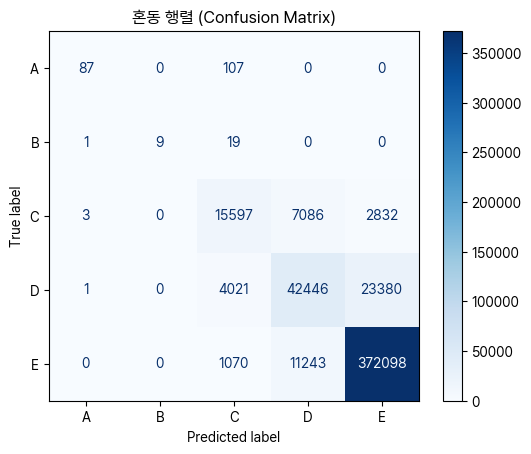

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 예측값: y_pred, 실제값: y_val (숫자형), 또는 문자형이면 inverse_transform 먼저
cm = confusion_matrix(y_val, y_pred, labels=[0,1,2,3,4])  # 또는 labels=le_y.transform(['A','B','C','D','E'])

# 시각화
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le_y.classes_)
disp.plot(cmap='Blues', values_format='d')

plt.title("혼동 행렬 (Confusion Matrix)")
plt.grid(False)
plt.show()

- 기존보다 피처 선정 후 (EDA 기반) 정확도 소폭 향상 (B, C , D 예측 상승)

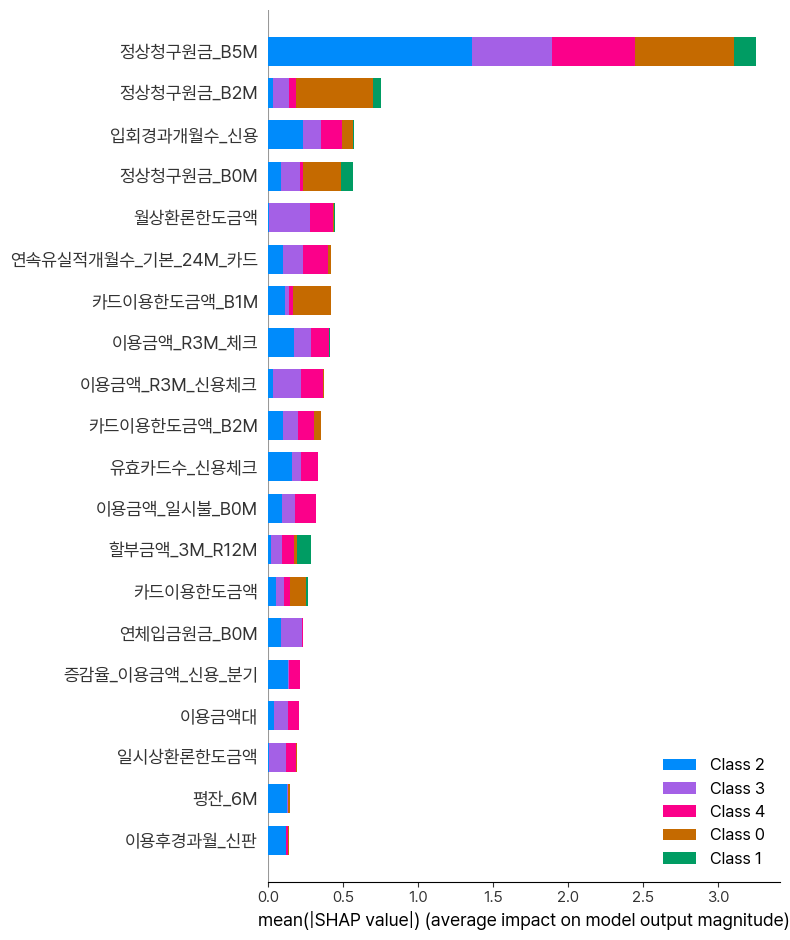

In [ ]:
import shap

explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_val)

shap.summary_plot(shap_values, X_val, plot_type="bar")

In [ ]:
import pandas as pd

importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": xgb_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

display(importance_df.head(30))

,Feature,Importance
69,이용금액대,0.149376
64,정상청구원금_B5M,0.142397
10,이용금액_R3M_신용체크,0.078886
66,연속유실적개월수_기본_24M_카드,0.048598
158,이용금액_R3M_체크,0.026548
169,이용후경과월_CA,0.022692
154,이용카드수_체크,0.022108
37,이용후경과월_체크,0.018695
171,정상청구원금_B0M,0.015652
2,입회경과개월수_신용,0.015201


### Threshold 조절

In [ ]:
y_proba = xgb_model.predict_proba(X_val)  # shape: (480000, 5)

In [ ]:

# Threshold 기반 예측함수 정의
def predict_with_thresholds(y_proba, thresholds):
    preds = []
    for row in y_proba:
        # threshold 넘는 후보 중 확률이 가장 높은 것
        candidates = [i for i, p in enumerate(row) if p >= thresholds[i]]
        if candidates:
            preds.append(candidates[np.argmax([row[i] for i in candidates])])
        else:
            preds.append(np.argmax(row))  # 아무것도 안 넘으면 최대 확률
    return np.array(preds)


In [ ]:
# Objective 함수 정의
def objective(trial):
    # 클래스 수
    n_classes = y_proba.shape[1]
    
    # threshold 범위 설정 (0.1~0.9)
    thresholds = [trial.suggest_float(f"th_{i}", 0.1, 0.9) for i in range(n_classes)]
    
    # 커스텀 예측
    y_pred = predict_with_thresholds(y_proba, thresholds)
    
    # macro F1-score 반환 (최적화 목적)
    return f1_score(y_val, y_pred, average='macro')


In [ ]:
import optuna
from sklearn.metrics import f1_score
import numpy as np

# 1. 예측 확률 준비
y_proba = xgb_model.predict_proba(X_val)

# 2. 최적화 실행
study = optuna.create_study(direction="maximize") # by Optuna
study.optimize(objective, n_trials=50)  # 50회 시도 (조절 가능)

# 3. 최적 threshold 출력
best_thresholds = [study.best_params[f"th_{i}"] for i in range(y_proba.shape[1])]
print("최적 threshold:", best_thresholds)


[I 2025-07-08 08:32:28,943] A new study created in memory with name: no-name-567face3-f0f4-4ded-a256-e1cc42ecf2ca
[I 2025-07-08 08:32:36,495] Trial 0 finished with value: 0.6650473462483518 and parameters: {'th_0': 0.27119458277820585, 'th_1': 0.2183161698580813, 'th_2': 0.5090465993368511, 'th_3': 0.17449459405672985, 'th_4': 0.48175186717185614}. Best is trial 0 with value: 0.6650473462483518.
[I 2025-07-08 08:32:44,010] Trial 1 finished with value: 0.6347438777597134 and parameters: {'th_0': 0.35145247868038576, 'th_1': 0.3931475978454294, 'th_2': 0.8921080793151327, 'th_3': 0.20261404662445212, 'th_4': 0.8116937729803534}. Best is trial 0 with value: 0.6650473462483518.
[I 2025-07-08 08:32:51,567] Trial 2 finished with value: 0.5977803683548499 and parameters: {'th_0': 0.8445847607072773, 'th_1': 0.3272737734779124, 'th_2': 0.20442154686745787, 'th_3': 0.17174789915798527, 'th_4': 0.6854726266055657}. Best is trial 0 with value: 0.6650473462483518.
[I 2025-07-08 08:32:58,942] Trial

최적 threshold: [0.2389739297249608, 0.15386522828702814, 0.8097105568394638, 0.5451912403812467, 0.7735493761725692]


In [ ]:
# Threshold 적용 및 평가
y_pred_best = predict_with_thresholds(y_proba, best_thresholds)
print(classification_report(y_val, y_pred_best))

              precision    recall  f1-score   support

           0       0.78      0.70      0.73       194
           1       0.83      0.52      0.64        29
           2       0.75      0.61      0.67     25518
           3       0.70      0.61      0.65     69848
           4       0.93      0.97      0.95    384411

    accuracy                           0.90    480000
   macro avg       0.80      0.68      0.73    480000
weighted avg       0.89      0.90      0.89    480000



In [ ]:
import json
with open("best_thresholds.json", "w") as f:
    json.dump(best_thresholds, f)

In [ ]:
# 저장
submission.to_csv("submission_threashold.csv", index=False)
print("✅ 중복 제거 후 저장 완료: submission_threashold.csv")

✅ 중복 제거 후 저장 완료: submission_threashold.csv


In [ ]:
print("Validation 분포:\n", pd.Series(y_val).value_counts(normalize=True))
print("Test 예측 분포:\n", pd.Series(y_test_pred).value_counts(normalize=True))

Validation 분포:
 4    0.800856
3    0.145517
2    0.053163
0    0.000404
1    0.000060
Name: proportion, dtype: float64
Test 예측 분포:
 E    0.830457
D    0.126510
C    0.042645
A    0.000365
B    0.000023
Name: proportion, dtype: float64


Best threshold 적용

In [ ]:
import pandas as pd
import numpy as np

# 1. test 데이터 불러오기
test_df = pd.read_parquet("../../data/통합_test_데이터.parquet")

# 2. 피처 선택
X_test = test_df[selected_feature].copy()

# 3. 범주형 인코딩 (학습 시 사용한 LabelEncoder로 동일하게 처리)
for col in X_test.select_dtypes(include='object').columns:
    X_test[col] = le.fit_transform(X_test[col].astype(str))

# 4. 결측치 처리 (학습 시 사용한 imputer 사용)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# 5. 스케일링 (학습 시 사용한 scaler 사용)
X_test_scaled = scaler.transform(X_test)

# 6. 확률 예측
y_test_proba = xgb_model.predict_proba(X_test_scaled)

# 7. threshold 기반 예측 함수 정의
def predict_with_thresholds(y_proba, thresholds):
    preds = []
    for row in y_proba:
        candidates = [i for i, p in enumerate(row) if p >= thresholds[i]]
        if candidates:
            preds.append(candidates[np.argmax([row[i] for i in candidates])])
        else:
            preds.append(np.argmax(row))  # fallback
    return np.array(preds)

# 8. 이미 찾은 best_thresholds 적용 (이 값은 앞에서 구해둔 것!)
# 예: best_thresholds = [0.22, 0.27, 0.50, 0.50, 0.55]
y_test_pred_encoded = predict_with_thresholds(y_test_proba, best_thresholds)

# 9. 숫자 라벨 → 문자 라벨로 복원
y_test_pred = le_y.inverse_transform(y_test_pred_encoded)

# 10. 제출 파일 구성
submission = pd.DataFrame({
    'ID': test_df['ID'],
    'Segment': y_test_pred
})

# 11. 중복 ID 제거 (가장 먼저 예측된 값 유지)
submission = submission.drop_duplicates(subset='ID', keep='first')

# 12. 제출 파일 저장
submission.to_csv("submission_threshold_tuned.csv", index=False)
print("✅ 최적 threshold 반영하여 저장 완료: submission_threshold_tuned.csv")


c:\Users\somee\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


✅ 최적 threshold 반영하여 저장 완료: submission_threshold_tuned.csv


## 📊 Threshold 조정 전 vs 후 성능 비교 (Validation 기준)

### ✅ 클래스별 정밀도, 재현율, F1-score

| Segment | Precision (전) | Recall (전) | F1-score (전) | Precision (후) | Recall (후) | F1-score (후) | 변화 |
|---------|----------------|-------------|---------------|----------------|-------------|---------------|------|
| A (0)   | 0.95           | 0.45        | 0.61          | 0.78           | 0.70        | **0.73**      | ▲ +0.12 |
| B (1)   | 1.00           | 0.31        | 0.47          | 0.83           | 0.52        | **0.64**      | ▲ +0.17 |
| C (2)   | 0.75           | 0.61        | 0.67          | 0.75           | 0.61        | 0.67          | - |
| D (3)   | 0.70           | 0.61        | 0.65          | 0.70           | 0.61        | 0.65          | - |
| E (4)   | 0.93           | 0.97        | 0.95          | 0.93           | 0.97        | 0.95          | - |

---

### ✅ 전체 지표 비교

| 지표               | 조정 전 | 조정 후 | 변화 |
|--------------------|---------|---------|------|
| Accuracy           | 0.90    | 0.90    | - |
| Macro F1-score     | 0.67    | **0.73**| ▲ +0.06 |
| Weighted F1-score  | 0.89    | 0.89    | - |

---

### 🔍 인사이트 요약

- Segment A, B와 같은 희귀 클래스의 재현율(Recall)과 F1-score가 **크게 향상**
- 다수 클래스(C, D, E)의 성능은 **유지**
- Threshold 튜닝을 통해 **macro F1-score가 0.67 → 0.73**으로 상승
- Accuracy와 Weighted F1은 동일하게 유지되어, **모델의 균형성 확보**